<a href="https://colab.research.google.com/github/daniel-786/Medical-Insurance-Cost-Prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical Insurance Cost Prediction

##Importing all the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

##Data Collection

In [ ]:
# load dataset
insurance_data = pd.read_csv("/content/medical_insurance.csv")

In [ ]:
# show dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurance_data.shape

(2772, 7)

In [ ]:
# information of data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
# checking missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# sex group
insurance_data["sex"].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

In [ ]:
# children
insurance_data["children"].value_counts()

children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

In [ ]:
# smoker vs non smoker
insurance_data["smoker"].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [ ]:
# region
insurance_data["region"].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [ ]:
# statistical measures
insurance_data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


##Visualisation

<Figure size 800x800 with 0 Axes>

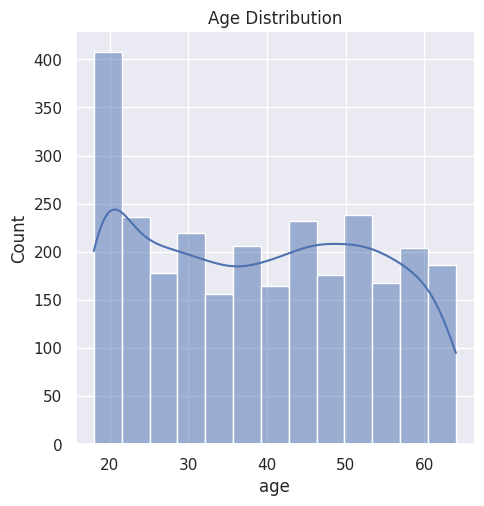

In [ ]:
# distribution of age data
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['age'], kde = True)
#sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

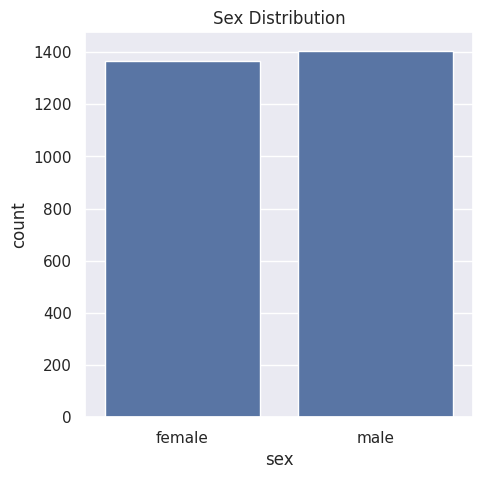

In [ ]:
# distribution of gender
plt.figure(figsize = (5, 5))
sns.countplot(x = "sex", data = insurance_data)
plt.title("Sex Distribution")
plt.show()

<Figure size 800x800 with 0 Axes>

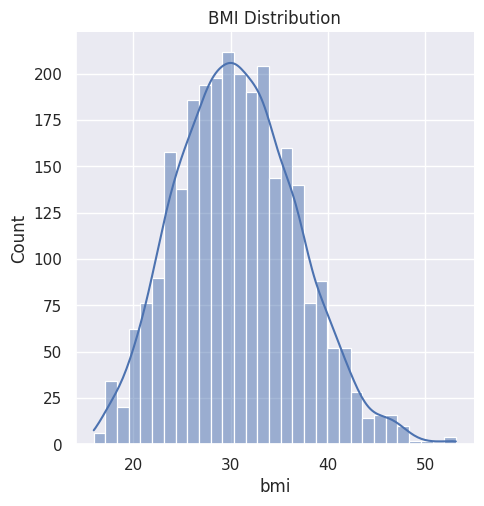

In [ ]:
# distribution of BMI data
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['bmi'], kde = True)
#sns.distplot(insurance_data['age'])
plt.title("BMI Distribution")
plt.show()

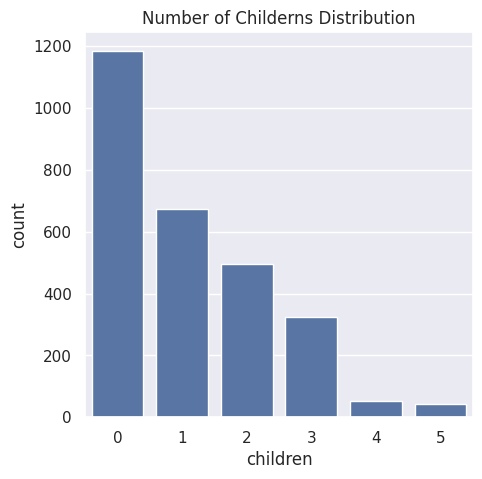

In [ ]:
# distribution children number
plt.figure(figsize = (5, 5))
sns.countplot(x = "children", data = insurance_data)
plt.title("Number of Childerns Distribution")
plt.show()

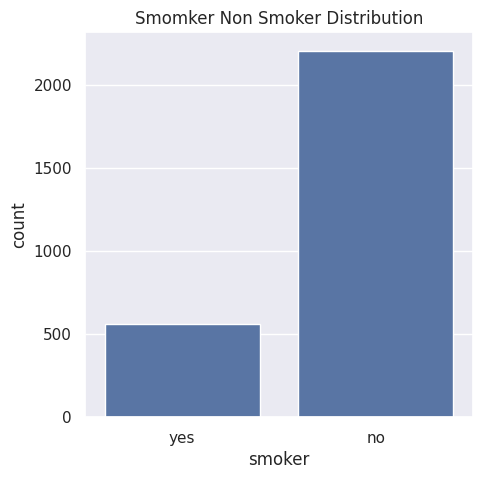

In [ ]:
# distribution smoke
plt.figure(figsize = (5, 5))
sns.countplot(x = "smoker", data = insurance_data)
plt.title("Smomker Non Smoker Distribution")
plt.show()

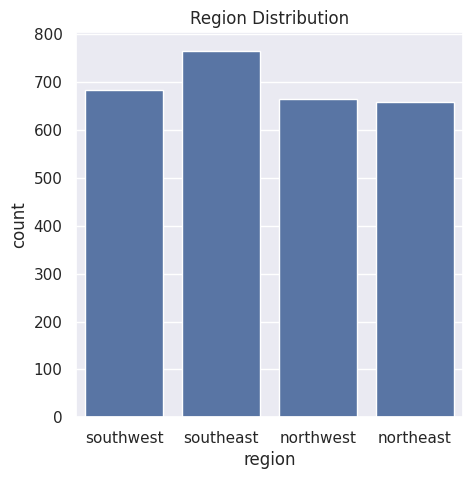

In [ ]:
# distribution region
plt.figure(figsize = (5, 5))
sns.countplot(x = "region", data = insurance_data)
plt.title("Region Distribution")
plt.show()

<Figure size 800x800 with 0 Axes>

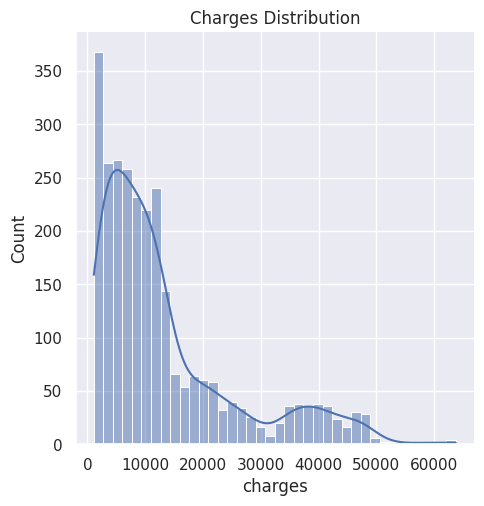

In [ ]:
# distribution of charges(insurance cost)
sns.set()
plt.figure(figsize = (8,8))
sns.displot(insurance_data['charges'], kde = True)
#sns.distplot(insurance_data['age'])
plt.title("Charges Distribution")
plt.show()

In [ ]:
# encoding categorical data

# sex
insurance_data.replace({"sex": {"male": 1, "female": 0}}, inplace = True)

# smoker
insurance_data.replace({"smoker": {"yes": 1, "no": 0}}, inplace = True)

#region
insurance_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace = True)

In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,0,8569.86180
2768,21,0,34.600,0,0,1,2020.17700
2769,19,1,26.030,1,1,3,16450.89470
2770,23,1,18.715,0,0,3,21595.38229


##Split Feature and Target

In [ ]:
X = insurance_data.drop(columns = "charges", axis = 1)
Y = insurance_data["charges"]

In [ ]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
2767   47    0  45.320         1       0       0
2768   21    0  34.600         0       0       1
2769   19    1  26.030         1       1       3
2770   23    1  18.715         0       0       3
2771   54    1  31.600         0       0       1

[2772 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


##Split Train and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (2772, 6)
Train data:  (2217, 6)
Test data:  (555, 6)


In [ ]:
print(X_train)
print(Y_train)

      age  sex     bmi  children  smoker  region
1415   31    1  36.300         2       1       1
646    39    1  26.220         1       0       3
2165   53    1  28.880         0       0       3
1344   56    1  40.300         0       0       1
1815   27    0  30.400         3       0       3
...   ...  ...     ...       ...     ...     ...
2514   34    1  32.800         1       0       1
2347   29    0  25.900         0       0       1
1608   32    1  30.800         3       0       1
2541   36    0  22.135         3       0       2
2575   23    0  28.000         0       0       1

[2217 rows x 6 columns]
1415    38711.00000
646      6123.56880
2165     9869.81020
1344    10602.38500
1815    18804.75240
           ...     
2514    14358.36437
2347     3353.28400
1608     5253.52400
2541     7228.21565
2575    13126.67745
Name: charges, Length: 2217, dtype: float64


##Model Training using Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

##Model Evaluation

In [ ]:
# trainning data
X_train_prediction = model.predict(X_train)

# R squered value
r2_score_train = r2_score(X_train_prediction, Y_train)

# MSE error
mse_loss_train = mean_squared_error(X_train_prediction, Y_train)

print("MSE loss: ", mse_loss_train)
print("R Squared Value: ", r2_score_train)

MSE loss:  35385418.71170499
R Squared Value:  0.677588039711492


In [ ]:
m, b = np.polyfit(Y_train, X_train_prediction, 1)

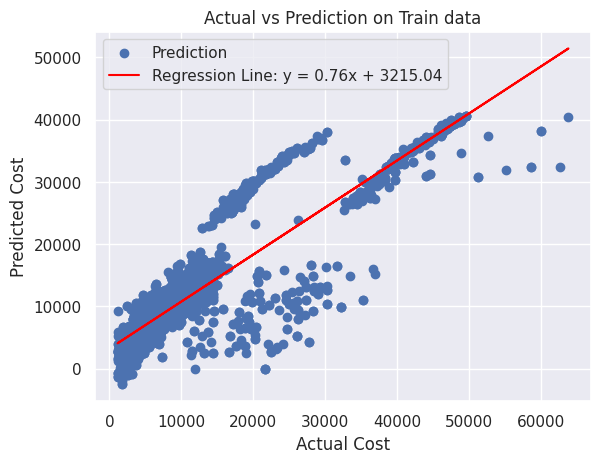

In [ ]:
# train data plot
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Prediction on Train data")
plt.plot(Y_train, m*Y_train + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()

In [ ]:
# test data
X_test_prediction = model.predict(X_test)

# R squered value
r2_score_test = r2_score(X_test_prediction, Y_test)

# MSE error
mse_loss_test = mean_squared_error(X_test_prediction, Y_test)

print("MSE loss: ", mse_loss_test)
print("R Squared Value: ", r2_score_test)

MSE loss:  42928644.97134612
R Squared Value:  0.5953600136463134


In [ ]:
m, b = np.polyfit(Y_test, X_test_prediction, 1)

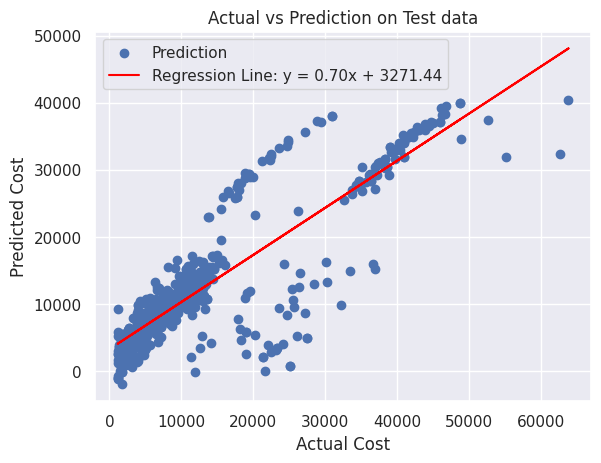

In [ ]:
# test data plot
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Prediction on Test data")
plt.plot(Y_test, m*Y_test + b, color = "red")
plt.legend(["Prediction", 'Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])
plt.show()


In [ ]:
Y_test_list = list(Y_test)

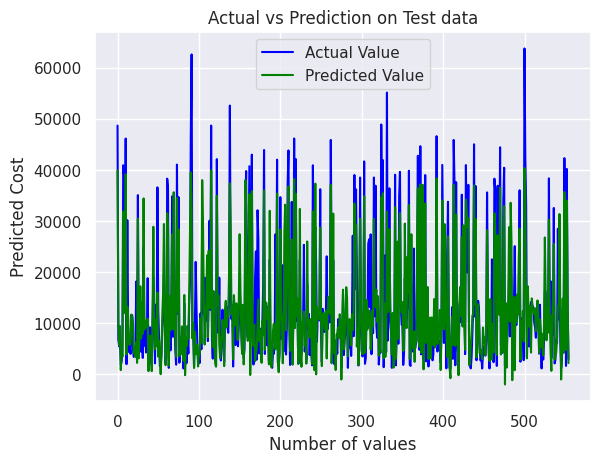

In [ ]:
# more green better prediction
plt.plot(Y_test_list, color = "blue", label = "Actual Value")
plt.plot(X_test_prediction, color = "green", label = "Predicted Value")
plt.title("Actual vs Prediction on Test data")
plt.xlabel("Number of values")
plt.ylabel("Predicted Cost")
plt.legend()
plt.show()

##Predictive System

In [ ]:
sample = X_test.iloc[0].values
sample

array([57.  ,  1.  , 42.13,  1.  ,  1.  ,  0.  ])

In [ ]:
Y_test.iloc[0]

48675.5177

In [ ]:
input_data = sample

# reshape the numpy array as we're predicting for one instance
input_data_reshaped = input_data.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("Predicted Cost: ", prediction[0])

Predicted Cost:  39922.603840812444


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
